# Exploratory Data Analysis

## Questions to Solve
* **Course Title**
    - What is the most frequent words in course title?
    - Longest/Shortest course title?
    - How can we build recommendation systems via title using similarity?
    - Most famous courses by number of subscribers?
* **Subjects/Categories**
    - What is the distribution of subjects?
    - How many courses per subject?
    - Distribution of subjects per year?
    - How many people purchase a particular subject?
    - Which subjects is the most popular?
* **Published Year**
    - Number of courses per year?
    - Which year has the highest number of courses?
    - What is the trend of courses per year?
* **Levels**
    - How many levels do we have?
    - What is the distribution of courses per level?
    - Which subject have the highest levels?
    - How many subscribers per level?
    - How many courses per level?
* **Duration of Course**
    - Which courses have the highest duration (paid and free)?
    - Which courses have higher durations?
    - Duration vs number of subscribers?
* **Subscribers**
    - Which course have the highest number of subscribers?
    - Average number of subscribers?
    - Number of subscribers per subject?
    - Number of subscribers per year?
* **Price**
    - What is the average price of a course?
    - What is the minimum and maximum price?
    - How much does Udemy earn?
    - The most profitable courses?
* **Correlation**
    - Does number of subscribers depend on;
        - Number of reviews?
        - Price?
        - Number of lectures?
        - Content duration?

In [1]:
# Import dependencies
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# read in / load dataset
df = pd.read_csv("udemy_course_data.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [3]:
# Get info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

## EDA on Subject/Category

* **Subjects/Categories**
    - What is the distribution of subjects?
    - How many courses per subject?
    - Distribution of subjects per year?
    - How many people purchase a particular subject?
    - Which subjects is the most popular?
    
**What is the distribution of subjects?**    

In [4]:
len(df["course_title"].absunique())

3683

There are 3683 unique number of courses in the dataset.

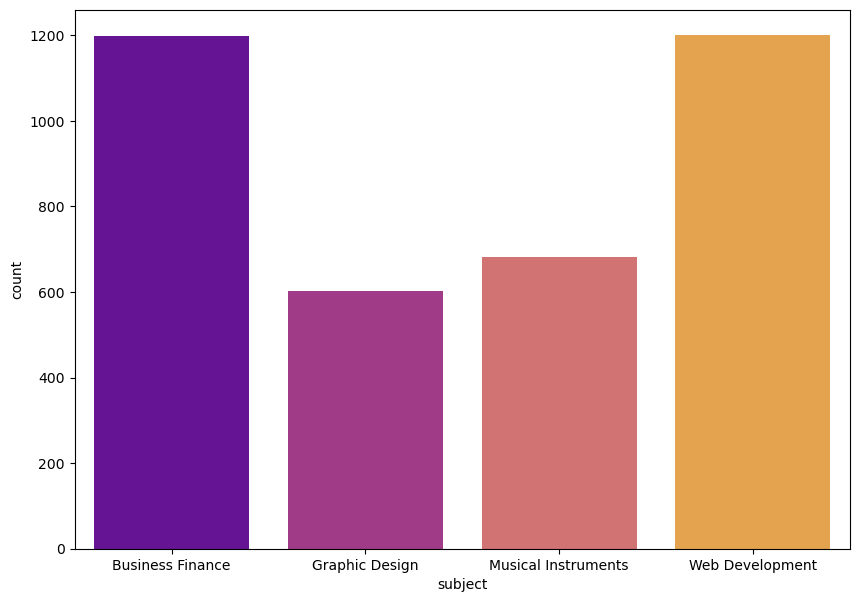

In [7]:
# Plot he grap of subject/category of courses
plt.figure(figsize=(10, 7))
sns.countplot(x="subject", data=df, palette="plasma");

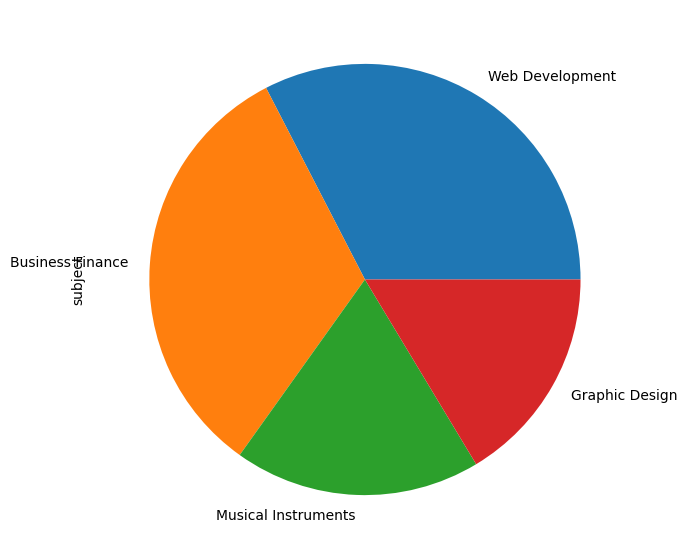

In [9]:
# plot a piechat of the "subject" column
plt.figure(figsize=(10, 7))
df["subject"].value_counts().plot(kind="pie");

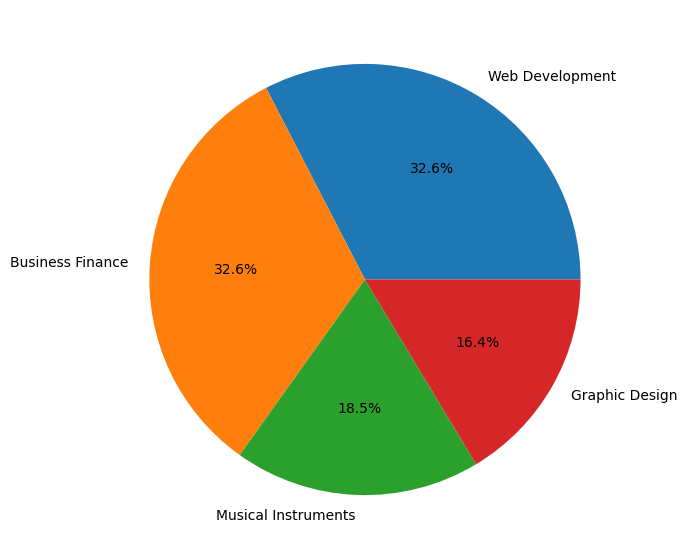

In [16]:
plt.figure(figsize=(10, 7))
plt.pie(df["subject"].value_counts(), 
        labels=df["subject"].value_counts().index, 
        autopct='%1.1f%%');

## EDA on Subscribers

* **Subscribers**
    - Which course have the highest number of subscribers?
    - Average number of subscribers?
    - Number of subscribers per subject?
    - Number of subscribers per year?

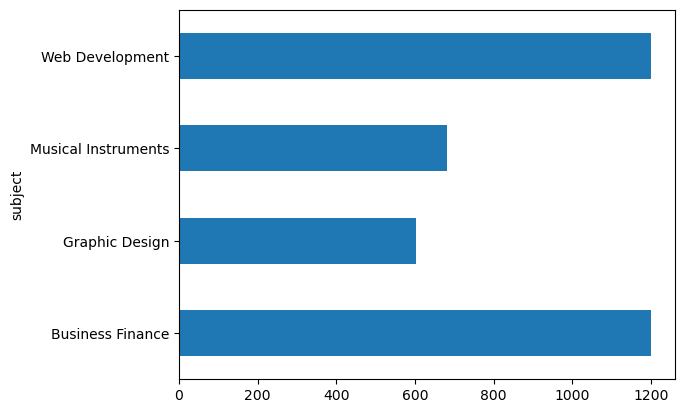

In [23]:
# Group subjects by number of subscribers and get count
df.groupby("subject")["num_subscribers"].count().plot(kind="barh");

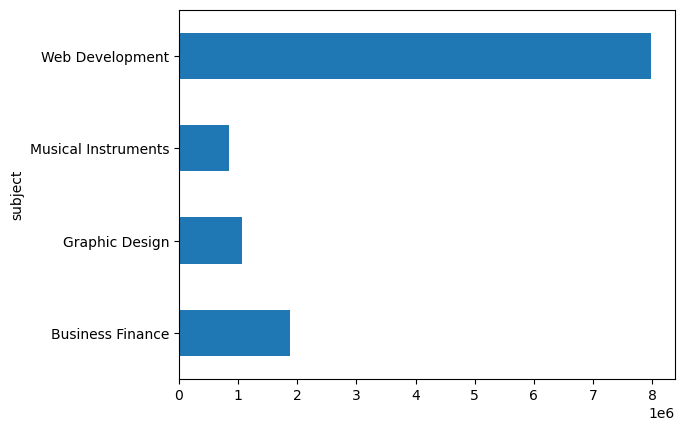

In [27]:
# Group subjects by number of subscribers and get sum
df.groupby("subject")["num_subscribers"].sum().plot(kind="barh");

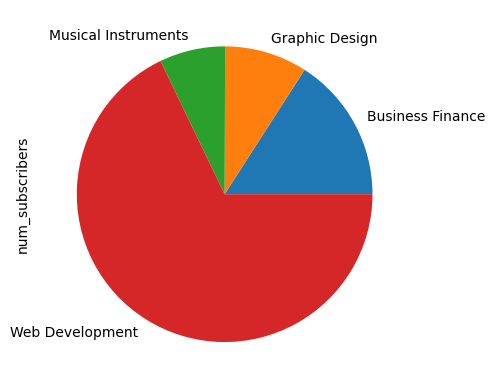

In [28]:
# pie chart of the number of subscribers per subject
df.groupby('subject')['num_subscribers'].sum().plot(kind = 'pie');